# Ridge Regression Part 1 - Geometric Intuition and Code | Regularized Linear Models

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [85]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [86]:
X = data.data
y = data.target

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [87]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [89]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()

Lin_reg.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = Lin_reg.predict(X_test)

In [91]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.5188113124539249
RMSE:  48.72713760953252


In [92]:
from sklearn.linear_model import Ridge

R = Ridge(alpha=0.0001)

R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [93]:
y_pred1 = R.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score:  0.518973263588496
RMSE:  48.718937001819505


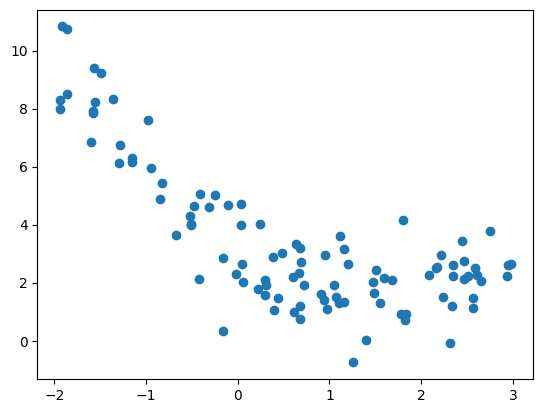

In [94]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

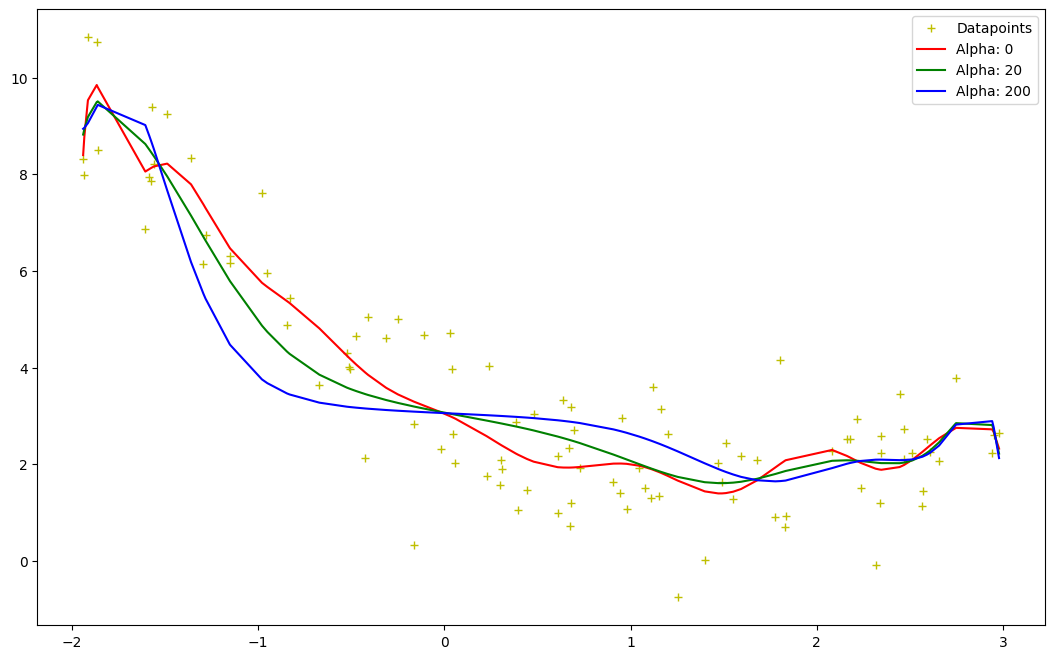

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)


alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(13, 8))
plt.plot(x1, x2, 'y+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)

    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label=f'Alpha: {alpha}')

plt.legend()
plt.show()

# Ridge Regression Part 2 | Mathematical Formulation & Code from scratch | Regularized Linear Models


### For 2 cols in OLS

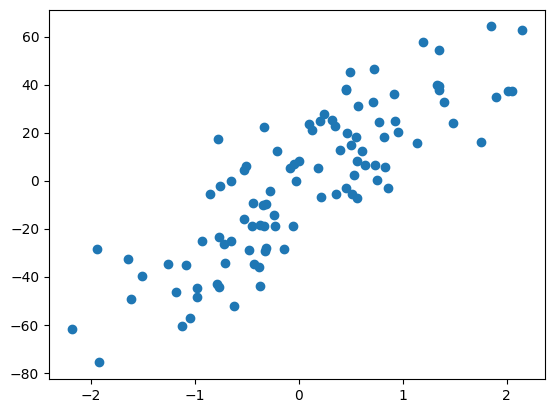

In [96]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

plt.scatter(X, y)

In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)

LinearRegression()

In [98]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [99]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=10)
rr.fit(X, y)

Ridge(alpha=10)

In [100]:
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


In [101]:
rr1 = Ridge(alpha=100)

rr1.fit(X, y)

Ridge(alpha=100)

In [102]:
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


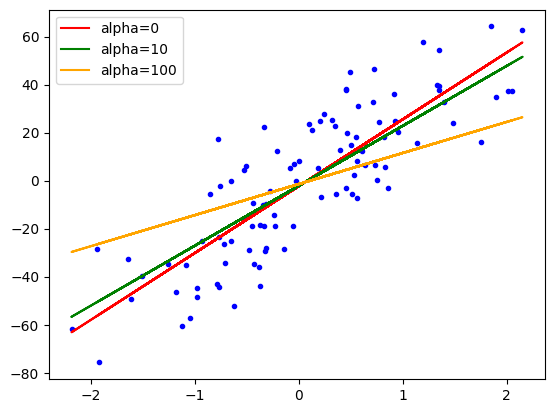

In [103]:
plt.plot(X, y, 'b. ')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rr.predict(X), color='green', label='alpha=10')
plt.plot(X, rr1.predict(X), color='orange', label='alpha=100')
plt.legend()

In [104]:
class MeraRidge:

    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num += (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den += (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

        self.m = num / (den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self, X_test):
        pass


In [105]:
reg = MeraRidge(10)

reg.fit(X, y)

[24.9546267]
[-2.126913]


In [106]:
reg2 = MeraRidge(100)

reg2.fit(X, y)

[12.93442104]
[-1.42484415]


### for n cols in OLS

In [107]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

X, y = load_diabetes(return_X_y=True)

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [109]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1, solver='cholesky')

reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [110]:
y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.46931288533098037

In [111]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [112]:
X_train

array([[ 0.0090156 , -0.04464164,  0.05522933, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 0.03081083,  0.05068012, -0.03422907, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 0.01628068, -0.04464164, -0.06332999, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 0.01628068,  0.05068012,  0.00996123, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 0.04897352,  0.05068012,  0.08109682, ...,  0.07120998,
         0.03243232,  0.04862759]])

In [113]:
np.insert(X_train, 0, 1, axis=1)

array([[ 1.        ,  0.0090156 , -0.04464164, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 1.        ,  0.03081083,  0.05068012, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 1.        ,  0.01628068, -0.04464164, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 1.        ,  0.01628068,  0.05068012, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 1.        ,  0.04897352,  0.05068012, ...,  0.07120998,
         0.03243232,  0.04862759]])

In [114]:
class MeraRidge:

    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)

        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [115]:
my_ridge = MeraRidge()
my_ridge.fit(X_train, y_train)

In [116]:
y_pred = my_ridge.predict(X_test)

r2_score(y_test, y_pred)

0.4693128853309805

In [117]:
print(my_ridge.coef_)
print(my_ridge.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


# Ridge Regression Part 3 | Gradient Descent | Regularized Linear Models

In [118]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [119]:
X, y = load_diabetes(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [120]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(penalty='l2', max_iter=500, eta0=0.1, learning_rate='constant', alpha=0.001)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score:  0.45791892243505106
[  47.83526652 -159.87096942  370.14949388  270.51143249   -8.17147025
  -59.41489694 -167.97126707  136.7108872   335.1556265    95.74149997]
[151.8746789]


In [121]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score:  0.46250101621576734
[  34.52193655 -290.84083104  482.40182913  368.06788094 -852.44871472
  501.59162034  180.11114301  270.7633618   759.73536409   37.49137054]
151.10198521305708


In [122]:
class MeraRidgeGD:

    def __init__(self, epochs, learning_rate, alpha):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha

    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_, 0, self.intercept_)

        X_train = np.insert(X_train, 0, 1, axis=1)

        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T, X_train).dot(thetha) - np.dot(X_train.T, y_train) + self.alpha * thetha
            thetha = thetha - self.learning_rate * thetha_der

        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [123]:
reg = MeraRidgeGD(epochs=500, alpha=0.001, learning_rate=0.005)

reg.fit(X_train, y_train)

In [124]:
y_pred = reg.predict(X_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score:  0.4738018280260914
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713472


# 5 Key Points - Ridge Regression | Part 4 | Regularized Linear Models

### 1. How are coefficients affected?

In [125]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

data = load_diabetes()

In [126]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [127]:
df.shape

(442, 11)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [129]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

coefs = []
r2_scores = []

for i in [0, 10, 100, 1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

In [130]:
r2_scores

[0.43993386615689634,
 0.15214327672566985,
 0.010378115936827137,
 -0.010136670498663625]

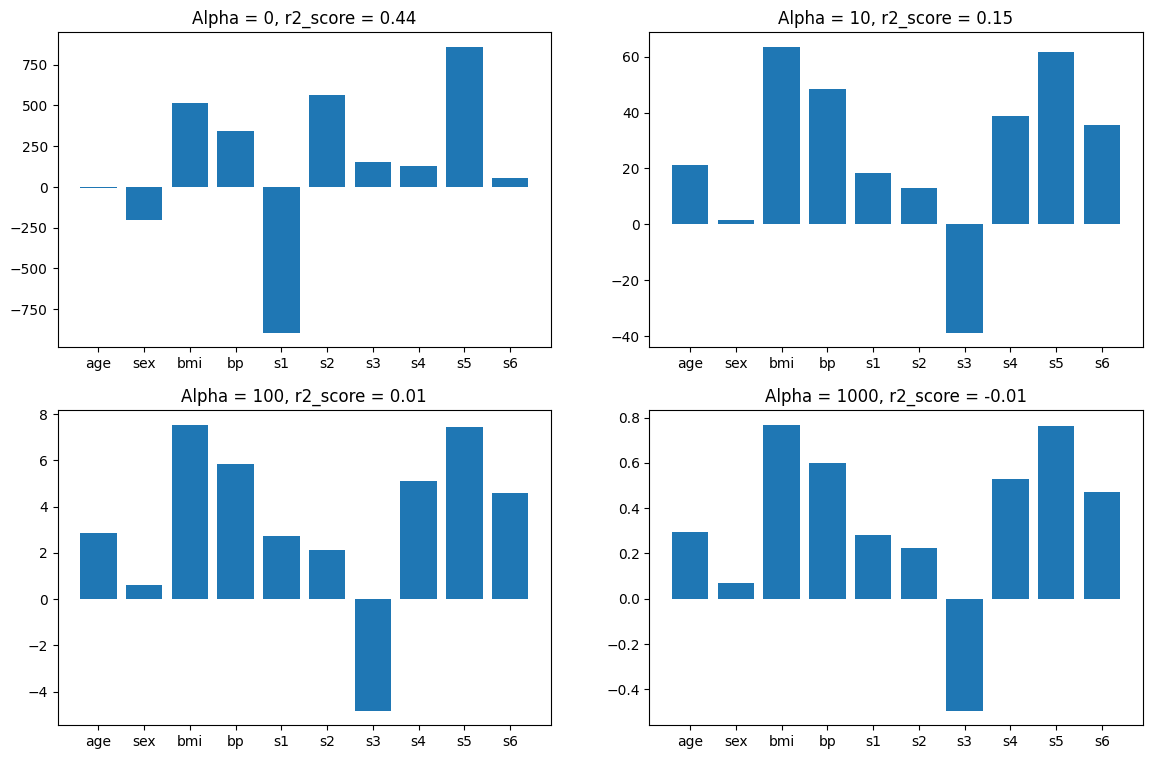

In [131]:
plt.figure(figsize=(14, 9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title(f'Alpha = 0, r2_score = {round(r2_scores[0], 2)}')

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title(f'Alpha = 10, r2_score = {round(r2_scores[1], 2)}')

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title(f'Alpha = 100, r2_score = {round(r2_scores[2], 2)}')

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title(f'Alpha = 1000, r2_score = {round(r2_scores[3], 2)}')

plt.show()

## 2. Higher Coefficients are affected more

In [132]:
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())

In [133]:
input_array = np.array(coefs)

input_array

array([[-9.15865318e+00, -2.05454322e+02,  5.16693745e+02,
         3.40619999e+02, -8.95552002e+02,  5.61220679e+02,
         1.53893110e+02,  1.26731397e+02,  8.61127002e+02,
         5.24211224e+01],
       [-9.11611927e+00, -2.05329219e+02,  5.16889664e+02,
         3.40549436e+02, -8.83423872e+02,  5.51559582e+02,
         1.48587063e+02,  1.25353015e+02,  8.56485935e+02,
         5.24689164e+01],
       [-8.76148719e+00, -2.04313404e+02,  5.18380608e+02,
         3.39967926e+02, -7.87700510e+02,  4.75282181e+02,
         1.06795253e+02,  1.14629265e+02,  8.19745723e+02,
         5.28733494e+01],
       [-6.39950705e+00, -1.98662945e+02,  5.22056516e+02,
         3.36340595e+02, -3.83717571e+02,  1.52670882e+02,
        -6.60532428e+01,  7.56082088e+01,  6.59875219e+02,
         5.58292206e+01],
       [ 6.64373321e+00, -1.72237474e+02,  4.85529585e+02,
         3.14675846e+02, -7.29402092e+01, -8.05886882e+01,
        -1.74463527e+02,  8.36147099e+01,  4.84365316e+02,
         7.

In [134]:
coefs_df = pd.DataFrame(input_array, columns=data.feature_names)
coefs_df['alpha'] = alphas
coefs_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [135]:
## above we can notice how the value of bmi reduced from 516 to 0
# similarly for s1, s2, s3, s5

In [136]:
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.1, 0.5, 1, 5, 10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())

In [137]:
input_array = np.array(coefs).T

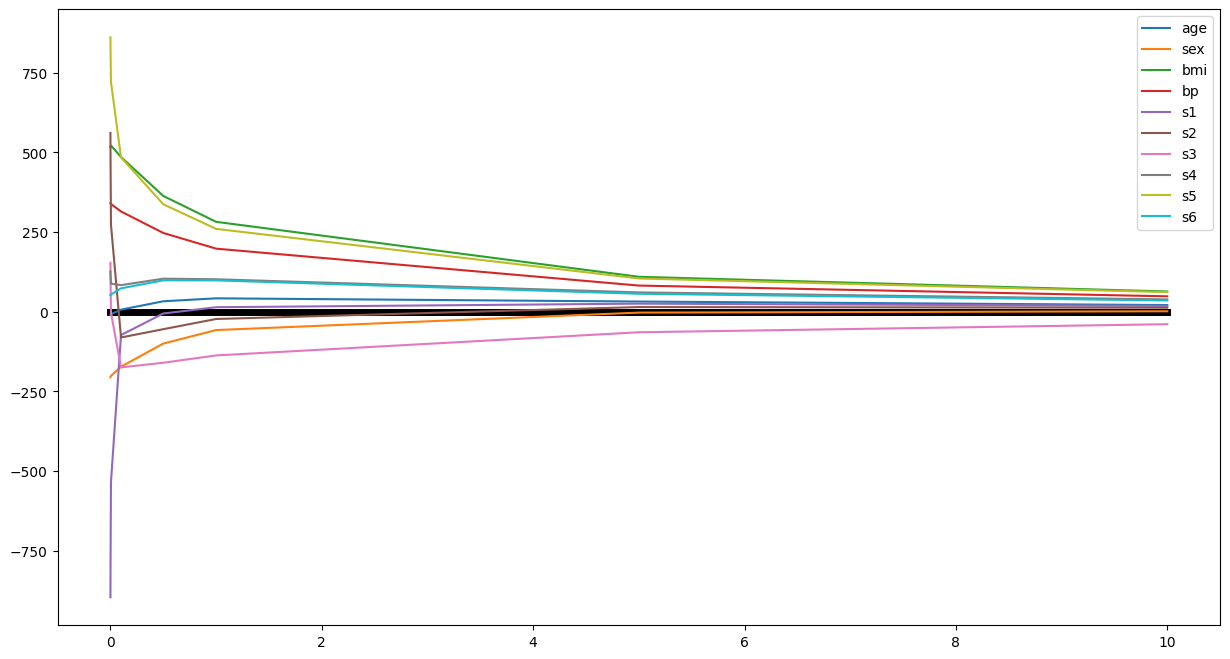

In [138]:
plt.figure(figsize=(15, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])
plt.legend()

In [139]:
# They will never reach 0

### 3.Impact on Bias and Variance

In [140]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

X

array([[-1.39396908],
       [ 0.31166915],
       [ 1.73170326],
       [ 2.59937272],
       [ 1.14332987],
       [-0.81655908],
       [ 1.68724363],
       [-1.40715254],
       [-1.24662017],
       [-0.21700949],
       [ 2.0082219 ],
       [-0.77104779],
       [ 1.03696319],
       [ 2.95654004],
       [-0.01030803],
       [-0.75836794],
       [-0.76417511],
       [ 1.41345031],
       [-0.71889397],
       [-0.59728575],
       [ 0.521562  ],
       [ 0.62716232],
       [ 1.19723724],
       [-1.36769563],
       [ 1.79700439],
       [ 1.44103091],
       [ 1.8924519 ],
       [-1.18040623],
       [-1.27243783],
       [-0.01746729],
       [-0.68916264],
       [ 1.69417013],
       [-1.32536945],
       [ 2.40028628],
       [ 0.96969524],
       [ 0.88332646],
       [ 0.91969122],
       [-0.47212709],
       [ 1.28974981],
       [ 0.80569488],
       [ 1.04117782],
       [ 2.68147788],
       [-1.77237052],
       [-0.47212413],
       [-1.61426239],
       [ 2

In [141]:
y

array([[ 7.42877016],
       [ 3.39789149],
       [ 1.65837258],
       [ 5.00990325],
       [ 2.60430633],
       [ 4.46915969],
       [ 0.36229453],
       [ 7.53296682],
       [ 6.87150752],
       [ 3.80590972],
       [-0.33914407],
       [ 4.04318514],
       [ 1.38209684],
       [ 2.15792275],
       [ 2.47903329],
       [ 5.56914112],
       [ 5.49340721],
       [ 2.50587502],
       [ 4.55622869],
       [ 5.70147226],
       [ 0.74659744],
       [-0.15339257],
       [ 2.29393388],
       [ 8.19566281],
       [ 0.85181411],
       [ 1.51600691],
       [-0.1080137 ],
       [ 5.59517627],
       [ 6.13711398],
       [ 2.95136606],
       [ 5.77867107],
       [ 1.48239463],
       [ 6.36719848],
       [ 1.5129897 ],
       [ 0.02918537],
       [ 1.44653058],
       [ 4.01639549],
       [ 3.35413396],
       [ 2.88619932],
       [ 1.76047437],
       [ 2.44331141],
       [ 1.84885656],
       [ 6.74427177],
       [ 4.96144226],
       [ 7.09599598],
       [-0

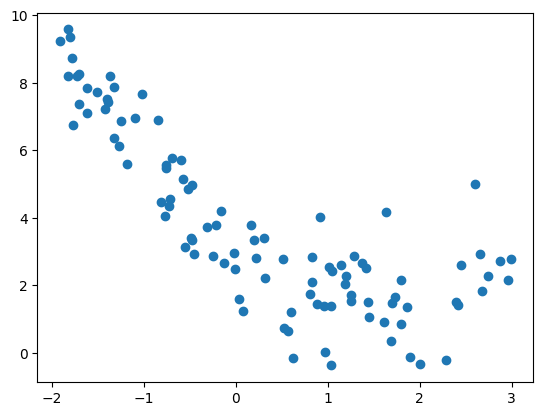

In [142]:
plt.scatter(X, y)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100, 1), y.reshape(100), test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)

(80, 1)
(20, 1)


In [144]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [152]:
alphas = np.linspace(0, 30, 100)

alphas

array([ 0.        ,  0.3030303 ,  0.60606061,  0.90909091,  1.21212121,
        1.51515152,  1.81818182,  2.12121212,  2.42424242,  2.72727273,
        3.03030303,  3.33333333,  3.63636364,  3.93939394,  4.24242424,
        4.54545455,  4.84848485,  5.15151515,  5.45454545,  5.75757576,
        6.06060606,  6.36363636,  6.66666667,  6.96969697,  7.27272727,
        7.57575758,  7.87878788,  8.18181818,  8.48484848,  8.78787879,
        9.09090909,  9.39393939,  9.6969697 , 10.        , 10.3030303 ,
       10.60606061, 10.90909091, 11.21212121, 11.51515152, 11.81818182,
       12.12121212, 12.42424242, 12.72727273, 13.03030303, 13.33333333,
       13.63636364, 13.93939394, 14.24242424, 14.54545455, 14.84848485,
       15.15151515, 15.45454545, 15.75757576, 16.06060606, 16.36363636,
       16.66666667, 16.96969697, 17.27272727, 17.57575758, 17.87878788,
       18.18181818, 18.48484848, 18.78787879, 19.09090909, 19.39393939,
       19.6969697 , 20.        , 20.3030303 , 20.60606061, 20.90

In [145]:
from mlxtend.evaluate import bias_variance_decomp

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse',
                                                                random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

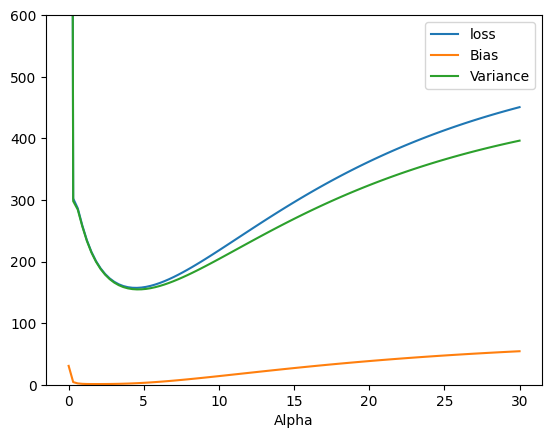

In [153]:
plt.plot(alphas, loss, label='loss')
plt.plot(alphas, bias, label='Bias')
plt.plot(alphas, variance, label='Variance')
plt.ylim(0, 6 00)
plt.xlabel('Alpha')
plt.legend()
plt.show()

### 4. Impact on Loss Function

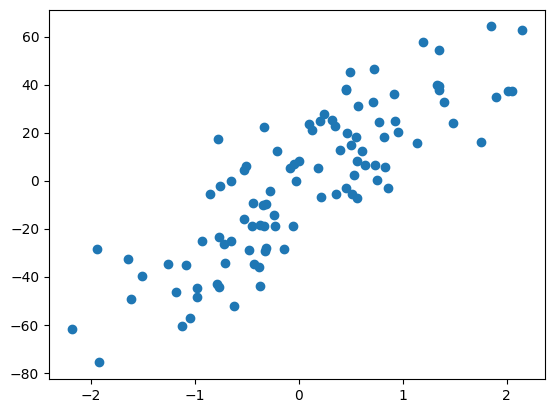

In [154]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

plt.scatter(X, y)

In [155]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [156]:
def cal_loss(m, alpha):
    return np.sum((y - m * X.ravel() + 2.29) ** 2) + alpha * m * m

In [157]:
def predict(m):
    return m * X - 2.29

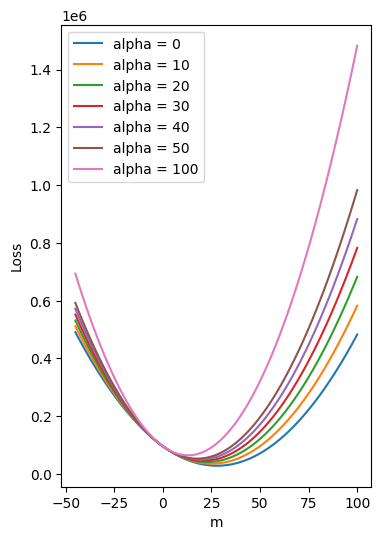

In [159]:
m = np.linspace(-45, 100, 100)

plt.figure(figsize=(4, 6))

for j in [0, 10, 20, 30, 40, 50, 100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i], j)
        loss.append(loss_i)
    
    plt.plot(m, loss, label=f'alpha = {j}')

plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()